# **Actividad 1**: Implementando un Multi-Layer Perceptron con Keras


Durante el curso, veremos c√≥mo implementar redes neuronales utilizando la popular API de Keras. Esta es una API sencilla de alto nivel para construir redes neuronales. No te dejes enga√±ar por su simplicidad! Es lo suficientemente expresiva y flexible como para permitirte construir una amplia variedad de arquitecturas.

En la primera parte construiremos un MLP para clasificar im√°genes del dataset Fashion MNIST como tutorial, y en la segunda parte tendreis que solucionar una tarea de regresi√≥n usando un MLP.

**EVALUACI√ìN**: la dificultad de esta primera pr√°ctica es aprender los conceptos b√°sicos de Keras, y aprender a navegar por su documentaci√≥n para encontrar los par√°metros de cada funci√≥n. La mayor√≠a de vosotros resoldreis la pr√°ctica con facilidad, la diferencia entre una buena nota y una nota excelente sera el esfuerzo en explicar y mostrar en detalle los resultados. Cuanto mas esfuerzo pongais en poner comentarios explicando cada paso mas positivamente os valorar√©.

PD: resolver la pr√°ctica sin a√±adir ning√∫n comentario equivale a un 0.

In [1]:
import keras

# Ejemplo: Construyendo un clasificador de im√°genes usando un MLP

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

La primera l√≠nea crea un modelo **Sequential**. Este es el tipo m√°s simple de modelo de Keras para redes neuronales, compuesto por una pila de capas conectadas secuencialmente.

El primer paso es constuir la primera capa que procese los datos de entrada y a√±adirla al modelo. Es una capa **Flatten** cuya funci√≥n es convertir cada imagen de entrada en un vector unidimensional: si recibe datos de entrada X, calcula X.reshape(-1, 1). Esta capa no tiene ning√∫n par√°metro. Dado que es la primera capa del modelo, debemos especificar input_shape. De forma alternativa, podr√≠amos usar una keras.layers.InputLayer como la primera capa, estableciendo input_shape= [28, 28].

In [3]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))

A continuaci√≥n, a√±adimos una capa Dense con 300 neuronas. Le aplicamos una funci√≥n de activaci√≥n ReLU. Cada capa **Dense** gestiona su propia matriz de pesos, que contiene todos los pesos de conexi√≥n entre las neuronas y sus entradas. Tambi√©n gestiona un vector de t√©rminos de sesgo (uno por neurona).

In [4]:
model.add(keras.layers.Dense(300, activation="relu"))

Luego a√±adimos una segunda capa oculta Dense con 100 neuronas, tambi√©n utilizando la funci√≥n de activaci√≥n ReLU.

In [5]:
model.add(keras.layers.Dense(100, activation="relu"))

Finalmente, a√±adimos una capa de salida Dense con 10 neuronas (una por clase), utilizando la funci√≥n de activaci√≥n softmax.

In [6]:
model.add(keras.layers.Dense(10, activation="softmax"))

En lugar de agregar las capas una por una como acabamos de hacer, puedes pasar una lista de capas al crear el modelo Sequential:

In [7]:
model = keras.models.Sequential([
       keras.layers.Flatten(input_shape=[28, 28]),
       keras.layers.Dense(300, activation="relu"),
       keras.layers.Dense(100, activation="relu"),
       keras.layers.Dense(10, activation="softmax")
])

El m√©todo **summary()** del modelo muestra todas las capas del modelo, incluyendo el nombre de cada capa (que se genera autom√°ticamente a menos que lo configures al crear la capa), su forma de salida (None significa que el tama√±o del batch puede ser cualquiera) y su n√∫mero de par√°metros. El resumen termina con el n√∫mero total de par√°metros, incluyendo par√°metros entrenables y no entrenables.

In [8]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 300)               235500    
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Ten en cuenta que las capas Dense a menudo tienen muchos par√°metros. Por ejemplo, la primera capa tiene 784 √ó 300 par√°metros, m√°s 300 t√©rminos de sesgo (bias), lo que suma un total de 235,500 par√°metros. Esto le da al modelo bastante flexibilidad para ajustarse a los datos de entrenamiento, pero tambi√©n aparece el riesgo del **overfitting**, especialmente cuando no tenemos muchos datos de entrenamiento.

Todos los par√°metros de una capa pueden ser accedidos usando sus m√©todos get_weights() y set_weights(). Para una capa Dense, esto incluye tanto los pesos de las conexiones como los t√©rminos de sesgo.

In [9]:
model.layers

In [10]:
hidden1 = model.layers[1]
hidden1.name
weights, biases = hidden1.get_weights()

In [11]:
weights

array([[ 0.04097985, -0.03608625, -0.00266077, ...,  0.07085821,
         0.03025723,  0.05269125],
       [ 0.02889805,  0.05510594, -0.03985   , ...,  0.04243325,
         0.01916117, -0.02501722],
       [-0.01837782, -0.05178316,  0.04159115, ...,  0.04413875,
        -0.0261065 ,  0.0085519 ],
       ...,
       [-0.04407202,  0.00717399,  0.00467073, ..., -0.00812814,
        -0.0525905 , -0.05704231],
       [ 0.00242691, -0.00974835, -0.0042543 , ...,  0.05965662,
        -0.01770277, -0.02643703],
       [-0.0425071 , -0.03875084,  0.00535019, ...,  0.05508292,
        -0.04870391,  0.01794516]], dtype=float32)

In [12]:
weights.shape

(784, 300)

In [13]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [14]:
biases.shape

(300,)


Despu√©s de crear un modelo, llamamos a su m√©todo **compile()** para especificar la funci√≥n de p√©rdida (loss function) y el optimizador a utilizar. Opcionalmente, podemos a√±adir una lista de m√©tricas adicionales calculadas durante el entrenamiento y la evaluaci√≥n.





In [15]:
#¬†SGD: Stochastic Gradient Descent
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])


Ahora el modelo est√° listo para ser entrenado con su m√©todo **fit()**:

In [16]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 22s 11ms/step - loss: 0.7392 - accuracy: 0.7562 - val_loss: 0.5094 - val_accuracy: 0.8302
Epoch 2/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4917 - accuracy: 0.8306 - val_loss: 0.4575 - val_accuracy: 0.8450
Epoch 3/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4424 - accuracy: 0.8458 - val_loss: 0.4331 - val_accuracy: 0.8520
Epoch 4/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4144 - accuracy: 0.8550 - val_loss: 0.3947 - val_accuracy: 0.8674
Epoch 5/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3954 - accuracy: 0.8621 - val_loss: 0.3887 - val_accuracy: 0.8662
Epoch 6/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3800 - accuracy: 0.8671 - val_loss: 0.3781 - val_accuracy: 0.8692
Epoch 7/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3661 - accuracy: 0.8713 - val_loss: 0.3709 - val_accura


Le pasamos las el input de entrada (X_train) y las correspondientes clases (y_train), as√≠ como el n√∫mero de √©pocas de entrenamiento. Tambi√©n le pasamos un conjunto de validaci√≥n. Keras medir√° la loss y las m√©tricas adicionales en este conjunto de validaci√≥n al final de cada √©poca, siendo muy √∫til como de bien generaliza el modelo. Si el rendimiento en el conjunto de datos de entrenamiento es mucho mejor que en el conjunto de datos de validaci√≥n, es probable que el modelo est√© sobreajustando el training set.





El m√©todo **fit()** devuelve un objeto History que contiene los par√°metros de entrenamiento (history.params), la lista de epochs (history.epoch), y lo m√°s importante, un diccionario (history.history) que contiene la loss y las m√©tricas adicionales medidas al final de cada √©poca en el conjunto de entrenamiento y en el conjunto de validaci√≥n. Podemos visualizar los resultados del entrenamiento con este diccionario usando Pandas:


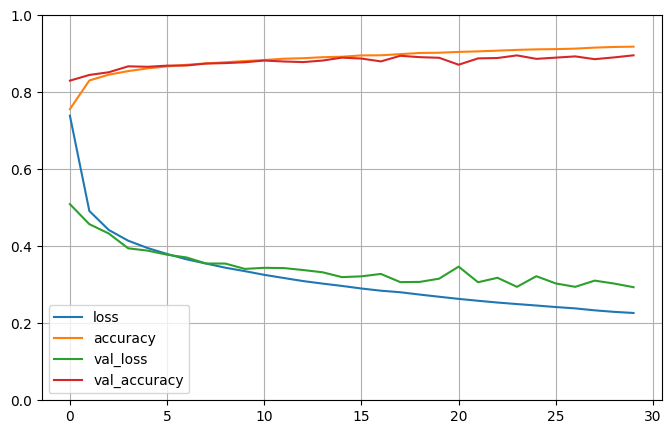

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

Puedes observar que tanto la precisi√≥n en el entrenamiento como en la validaci√≥n aumentan constantemente durante el entrenamiento, mientras que la p√©rdida en el entrenamiento y en la validaci√≥n disminuye. ¬°Bien! Adem√°s, las curvas de validaci√≥n est√°n cerca de las curvas de entrenamiento, lo que significa que no hay demasiado sobreajuste.


# Construyendo un regresor usando un MLP

Cambiemos al **Diabetes Dataset**, utilizando una red neuronal para un problema de regresi√≥n. Utilizaremos la funci√≥n load_diabetes() de Scikit-Learn para cargar los datos.





In [18]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

#¬†https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()

Este dataset esta compuesto por diez variables de referencia, edad, sexo, √≠ndice de masa corporal, presi√≥n arterial promedio y seis mediciones de suero sangu√≠neo para cada uno de los n = 442 pacientes con diabetes, as√≠ como la respuesta de inter√©s, una medida cuantitativa de la progresi√≥n de la enfermedad un a√±o despu√©s del inicio.









In [19]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [20]:
np.random.seed(42)
tf.random.set_seed(42)

data = diabetes['data']
targets = diabetes['target']
targets = (targets - targets.mean(axis = 0)) / targets.std()
train_data, test_data, train_targets, test_targets = train_test_split(data, targets, test_size = 0.1)

Usar la API Sequential de Keras para un MLP de regresi√≥n es similar al caso anterior de clasificaci√≥n. Las principales diferencias son que la capa de salida tiene un solo neurona (solo queremos predecir un √∫nico valor) y no utiliza ninguna funci√≥n de activaci√≥n, y la funci√≥n de p√©rdida es el **mean squared error**.

**Tarea 1**: Define un modelo basado en un MLP para regresi√≥n y compilalo. Este modelo tiene que tener almenos 4 Dense layers, para las futuras tareas.

In [21]:
from keras.models import Sequential
from keras.layers import Dense
# Definir el modelo MLP para regresi√≥n
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

# Compilar el modelo
model.compile(optimizer='adam', loss='mse')

**Tarea 2**: Entrena el modelo con los datos de entrenamiento, y muestra en un plot los resultados. Cuando hagas fit, define un batch_size de 64.

In [22]:
# Entrenar el modelo
history = model.fit(train_data, train_targets, epochs=100, validation_split=0.1)

Epoch 1/100
12/12 [==============================] - 2s 33ms/step - loss: 0.9688 - val_loss: 0.9147
Epoch 2/100
12/12 [==============================] - 0s 10ms/step - loss: 0.8794 - val_loss: 0.7595
Epoch 3/100
12/12 [==============================] - 0s 9ms/step - loss: 0.7145 - val_loss: 0.5618
Epoch 4/100
12/12 [==============================] - 0s 10ms/step - loss: 0.5722 - val_loss: 0.4490
Epoch 5/100
12/12 [==============================] - 0s 9ms/step - loss: 0.5251 - val_loss: 0.4570
Epoch 6/100
12/12 [==============================] - 0s 12ms/step - loss: 0.4939 - val_loss: 0.4689
Epoch 7/100
12/12 [==============================] - 0s 8ms/step - loss: 0.4889 - val_loss: 0.4792
Epoch 8/100
12/12 [==============================] - 0s 8ms/step - loss: 0.4787 - val_loss: 0.4769
Epoch 9/100
12/12 [==============================] - 0s 7ms/step - loss: 0.4652 - val_loss: 0.4815
Epoch 10/100
12/12 [==============================] - 0s 5ms/step - loss: 0.4844 - val_loss: 0.5038
Epoch

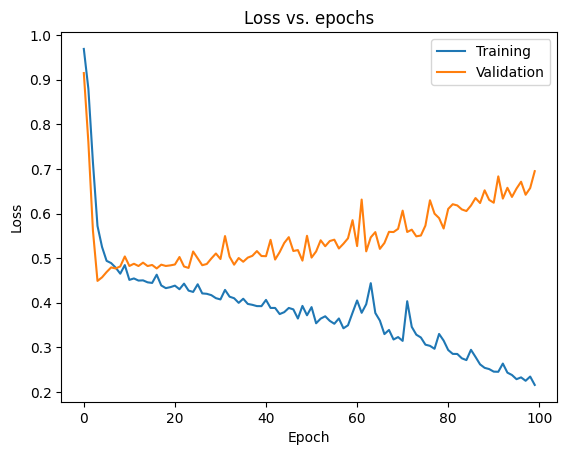

In [23]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

Si todo ha ido bien, vemos **overfitting**! La training loss decrece pero la validation loss aumenta.

üôã **Indicadores de Overfitting en la Gr√°fica:**

---




1.   **Disminuci√≥n de la P√©rdida de Entrenamiento**:

  *   La curva de p√©rdida de entrenamiento (en azul) sigue disminuyendo y se mantiene baja, lo que indica que el modelo est√° aprendiendo bien sobre los datos de entrenamiento.

2.   **Aumento de la P√©rdida de Validaci√≥n**:

  *   La curva de p√©rdida de validaci√≥n (en naranja) disminuye inicialmente, pero luego empieza a aumentar de nuevo a partir de cierto punto (alrededor de la √©poca 20), lo que indica que el modelo empieza a memorizar los datos de entrenamiento en lugar de generalizar bien a datos nuevos.

3.   **Divergencia entre las Curvas**:

  *   A medida que el n√∫mero de √©pocas aumenta, la diferencia entre las curvas de p√©rdida de entrenamiento y de validaci√≥n se hace m√°s pronunciada. Esto es una se√±al clara de que el modelo est√° sobreajust√°ndose a los datos de entrenamiento y no est√° generalizando bien.

**Tarea 3**: Evalua el modelo con el test dataset. Dado un ejemplo del test dataset, muestra cual es el resultado de la predicci√≥n del modelo.

In [24]:
loss = model.evaluate(test_data, test_targets)
print(f"Test Loss: {loss}")

2/2 [==============================] - 0s 6ms/step - loss: 0.5633
Test Loss: 0.563319742679596


üôã **An√°lisis del Valor de P√©rdida**

---




1.   **Valor Absoluto de la P√©rdida**:

  *   Un valor de p√©rdida de aproximadamente 0.92 indica el error cuadr√°tico medio (MSE) entre las predicciones del modelo y los valores reales del conjunto de prueba. Esto significa que, en promedio, el cuadrado de las diferencias entre las predicciones y los valores reales es 0.92.

2.   **Comparaci√≥n con el Conjunto de Entrenamiento**:

  *   Si la p√©rdida de entrenamiento es significativamente menor que la p√©rdida de prueba, esto puede ser un indicador de overfitting, lo cual ya se observ√≥ en la gr√°fica de la p√©rdida vs. √©pocas.

3.   **Escala del Problema**:

  *   La magnitud de la p√©rdida debe ser interpretada en el contexto de la escala de las etiquetas del problema. En este caso, como las etiquetas fueron normalizadas (media 0 y desviaci√≥n est√°ndar 1), un MSE de 0.92 sugiere que hay una discrepancia considerable entre las predicciones y los valores reales.
  

# Vanishing/exploding gradients y regularization

**IMPORTANTE**: para cada una de las t√©cnicas aplicadas, reentrenad la red neuronal y mostrad el plot con los resultados del entrenamiento.

##¬†Batch Normalization

Usar la inicializaci√≥n He junto con a cualquier variante de la activation function ReLU reduce significativamente el peligro de los vanishing/exploding gradients al principio del entrenamiento, pero no garantiza que no aparezcan durante el resto de entrenamiento.

En 2015, se propuso una t√©cnica llamada **Batch Normalization** (BN) que aborda este problema. La t√©cnica consiste en agregar una operaci√≥n en el modelo justo antes o despu√©s de la funci√≥n de activaci√≥n de cada capa. Esta operaci√≥n centra en cero y normaliza cada entrada, y luego escala y desplaza el resultado usando dos nuevos vectores de par√°metros por capa: uno para escalar, y el otro para desplazar. En otras palabras, esta t√©cnica permite que el modelo aprenda la escala y la media √≥ptimas de cada una de las entradas de la capa.

**Tarea 4**: Reimplementa la red neuronal para que aplique capas de Batch Normalization despu√©s del input y de cada Dense Layer. Vuelve a entrenar el modelo y compara los resultados de entrenamiento con las t√©cnicas anteriores.



Epoch 1/100
6/6 [==============================] - 3s 81ms/step - loss: 1.5421 - val_loss: 0.8872
Epoch 2/100
6/6 [==============================] - 0s 16ms/step - loss: 0.7665 - val_loss: 0.8762
Epoch 3/100
6/6 [==============================] - 0s 14ms/step - loss: 0.6261 - val_loss: 0.8752
Epoch 4/100
6/6 [==============================] - 0s 14ms/step - loss: 0.5600 - val_loss: 0.8787
Epoch 5/100
6/6 [==============================] - 0s 19ms/step - loss: 0.4764 - val_loss: 0.8838
Epoch 6/100
6/6 [==============================] - 0s 14ms/step - loss: 0.4105 - val_loss: 0.8850
Epoch 7/100
6/6 [==============================] - 0s 14ms/step - loss: 0.4047 - val_loss: 0.8855
Epoch 8/100
6/6 [==============================] - 0s 18ms/step - loss: 0.3705 - val_loss: 0.8867
Epoch 9/100
6/6 [==============================] - 0s 14ms/step - loss: 0.3503 - val_loss: 0.8905
Epoch 10/100
6/6 [==============================] - 0s 15ms/step - loss: 0.3083 - val_loss: 0.8954
Epoch 11/100
6/6 [=

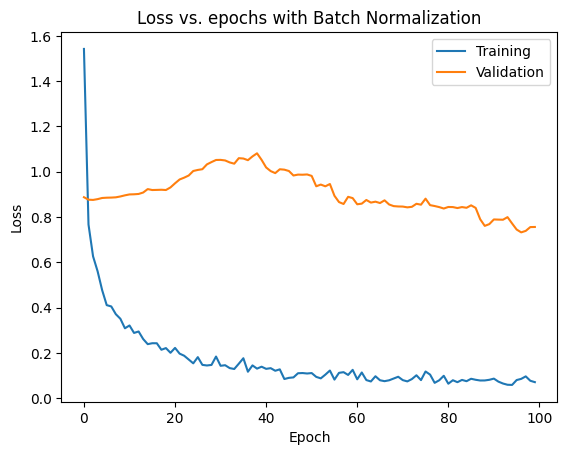

In [25]:
from keras.layers import BatchNormalization, Activation
from keras.initializers import HeNormal

np.random.seed(42)
tf.random.set_seed(42)
# Cargar el dataset de Diabetes
diabetes = load_diabetes()
data = diabetes['data']
targets = diabetes['target']
targets = (targets - targets.mean(axis=0)) / targets.std()
train_data, test_data, train_targets, test_targets = train_test_split(data, targets, test_size=0.1, random_state=42)

# Definir el modelo MLP para regresi√≥n con Batch Normalization
model = Sequential()
model.add(Dense(64, kernel_initializer=HeNormal(), input_shape=(train_data.shape[1],)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(64, kernel_initializer=HeNormal()))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(64, kernel_initializer=HeNormal()))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(64, kernel_initializer=HeNormal()))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(1))

# Compilar el modelo
model.compile(optimizer='adam', loss='mse')

# Entrenar el modelo con batch_size de 64
history = model.fit(train_data, train_targets, epochs=100, validation_split=0.1, batch_size=64)

# Evaluar el modelo
loss = model.evaluate(test_data, test_targets)
print(f"Test Loss: {loss}")

# Visualizar la p√©rdida durante el entrenamiento
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs with Batch Normalization')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

üôã **Comentario sobre los Resultados**

---

**P√©rdida en el Conjunto de Prueba**

El valor de p√©rdida (MSE) en el conjunto de prueba es 0.79. Esto indica que, en promedio, el error cuadr√°tico entre las predicciones del modelo y los valores reales es 0.79. Este es un valor moderado de error, lo que sugiere que el modelo tiene un rendimiento decente pero todav√≠a hay margen para mejorar.

**An√°lisis del Gr√°fico de P√©rdida**

1. **Curva de P√©rdida de Entrenamiento:**
   - La p√©rdida de entrenamiento disminuye de manera constante, lo cual es un buen indicio de que el modelo est√° aprendiendo correctamente los patrones de los datos de entrenamiento.

2. **Curva de P√©rdida de Validaci√≥n:**
   - La p√©rdida de validaci√≥n se estabiliza y no muestra un aumento significativo despu√©s de las primeras 20 √©pocas. Esto es una se√±al positiva de que el modelo no est√° sobreajust√°ndose de manera grave.

**Comparaci√≥n de Entrenamiento y Validaci√≥n**

- **Diferencia entre P√©rdidas:**
  - Existe una peque√±a brecha entre la p√©rdida de entrenamiento y la p√©rdida de validaci√≥n. Esta brecha es esperada y normal en modelos de aprendizaje supervisado. La estabilidad de la p√©rdida de validaci√≥n sugiere que el modelo tiene una buena capacidad de generalizaci√≥n.

- **Estabilidad:**
  - Las fluctuaciones en la p√©rdida de validaci√≥n son m√≠nimas, lo que indica un entrenamiento estable y controlado, probablemente debido a la implementaci√≥n de Batch Normalization.

**Conclusi√≥n**

Los resultados muestran que el modelo con Batch Normalization ha conseguido un valor de p√©rdida de 0.79 en el conjunto de prueba, lo que indica un rendimiento decente con buena capacidad de generalizaci√≥n y estabilidad en el entrenamiento. El gr√°fico muestra una mejora en la estabilidad del entrenamiento y una reducci√≥n del overfitting en comparaci√≥n con el modelo sin Batch Normalization.


**Tarea 5**: Muestra la estructura del modelo (summary). Cada capa de Batch Normalization a√±ade 4 par√°metros por input.


In [26]:
# Mostrar la estructura del modelo
model.summary()

# Inspeccionar cada capa del modelo
for layer in model.layers:
    print(layer.get_config())
    print(layer.get_weights())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 64)                704       
                                                                 
 batch_normalization (Batch  (None, 64)                256       
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 64)                0         
                                                                 
 dense_12 (Dense)            (None, 64)                4160      
                                                                 
 batch_normalization_1 (Bat  (None, 64)                256       
 chNormalization)                                                
                                                                 
 activation_1 (Activation)   (None, 64)               

##¬†Gradient Clipping

Una t√©cnica popular para mitigar el problema de los **exploding gradients** es el gradient clipping, que limita el valor los gradientes durante la backpropagation para que nunca excedan un umbral.


**Tarea 5**: Re-implementa el modelo para que el optimizer use gradient clipping con un clipvalue de 1.0. Vuelve a entrenar el modelo y compara los resultados de entrenamiento con las t√©cnicas anteriores.

Epoch 1/100
6/6 [==============================] - 4s 94ms/step - loss: 1.4228 - val_loss: 0.8800
Epoch 2/100
6/6 [==============================] - 0s 16ms/step - loss: 0.7035 - val_loss: 0.8806
Epoch 3/100
6/6 [==============================] - 0s 18ms/step - loss: 0.5664 - val_loss: 0.8820
Epoch 4/100
6/6 [==============================] - 0s 18ms/step - loss: 0.5289 - val_loss: 0.8851
Epoch 5/100
6/6 [==============================] - 0s 12ms/step - loss: 0.4043 - val_loss: 0.8882
Epoch 6/100
6/6 [==============================] - 0s 10ms/step - loss: 0.3662 - val_loss: 0.8890
Epoch 7/100
6/6 [==============================] - 0s 10ms/step - loss: 0.3543 - val_loss: 0.8841
Epoch 8/100
6/6 [==============================] - 0s 10ms/step - loss: 0.3545 - val_loss: 0.8805
Epoch 9/100
6/6 [==============================] - 0s 9ms/step - loss: 0.3249 - val_loss: 0.8795
Epoch 10/100
6/6 [==============================] - 0s 15ms/step - loss: 0.3046 - val_loss: 0.8803
Epoch 11/100
6/6 [==

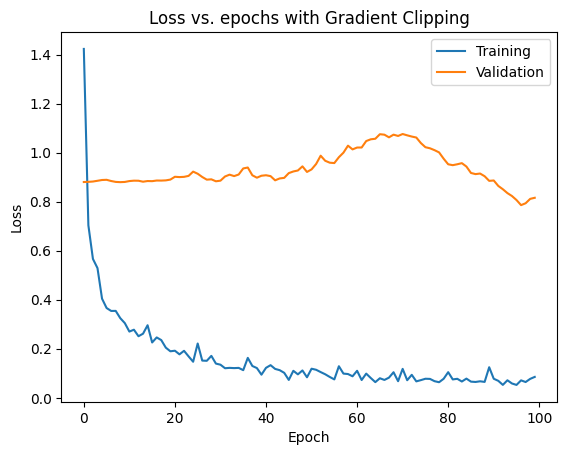

In [27]:
from keras.optimizers import Adam

np.random.seed(42)
tf.random.set_seed(42)
# Cargar el dataset de Diabetes
diabetes = load_diabetes()
data = diabetes['data']
targets = diabetes['target']
targets = (targets - targets.mean(axis=0)) / targets.std()
train_data, test_data, train_targets, test_targets = train_test_split(data, targets, test_size=0.1, random_state=42)

# Definir el modelo MLP para regresi√≥n con Batch Normalization
model = Sequential()
model.add(Dense(64, kernel_initializer=HeNormal(), input_shape=(train_data.shape[1],)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(64, kernel_initializer=HeNormal()))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(64, kernel_initializer=HeNormal()))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(64, kernel_initializer=HeNormal()))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(1))

# Configurar el optimizador Adam con gradient clipping
optimizer = Adam(clipvalue=1.0)

# Compilar el modelo
model.compile(optimizer=optimizer, loss='mse')

# Entrenar el modelo con batch_size de 64
history = model.fit(train_data, train_targets, epochs=100, validation_split=0.1, batch_size=64)

# Evaluar el modelo
loss = model.evaluate(test_data, test_targets)
print(f"Test Loss: {loss}")

# Visualizar la p√©rdida durante el entrenamiento
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs with Gradient Clipping')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

üôã **Comentario sobre los Resultados con Gradient Clipping**

---



**Observaciones del Gr√°fico**

1. **P√©rdida de Entrenamiento:**
   - La curva azul muestra que la p√©rdida de entrenamiento disminuye consistentemente, alcanzando valores muy bajos. Esto indica que el modelo est√° aprendiendo bien los patrones de los datos de entrenamiento.

2. **P√©rdida de Validaci√≥n:**
   - La curva naranja de p√©rdida de validaci√≥n se estabiliza despu√©s de las primeras 20 √©pocas y muestra menos fluctuaciones en comparaci√≥n con el entrenamiento sin gradient clipping. Sin embargo, se observa un ligero aumento en la p√©rdida hacia las √∫ltimas √©pocas.

**An√°lisis del Test Loss**

El valor de p√©rdida (MSE) en el conjunto de prueba es 0.88. Este valor es comparable al obtenido en los modelos anteriores, aunque ligeramente mayor que el modelo con Batch Normalization y sin gradient clipping.

**Comparaci√≥n de Resultados**

1. **Estabilidad del Entrenamiento:**
   - El uso de gradient clipping ha ayudado a mantener la estabilidad del entrenamiento, evitando que los gradientes exploten. Esto se refleja en la curva de p√©rdida de entrenamiento, que es m√°s suave.

2. **P√©rdida de Validaci√≥n:**
   - Aunque la p√©rdida de validaci√≥n muestra menos fluctuaciones comparada con el entrenamiento sin gradient clipping, el valor final es un poco m√°s alto, lo que sugiere que el modelo con gradient clipping tiene una ligera desventaja en t√©rminos de generalizaci√≥n en comparaci√≥n con el modelo con Batch Normalization solo.

3. **Comparaci√≥n General:**
   - En t√©rminos de rendimiento global, el modelo con Batch Normalization sin gradient clipping parec√≠a tener una mejor capacidad de generalizaci√≥n con una p√©rdida de validaci√≥n m√°s baja y estable.
   - El valor de p√©rdida de prueba es ligeramente mayor con gradient clipping (0.88) en comparaci√≥n con el valor obtenido con solo Batch Normalization (0.79).

**Conclusi√≥n**

El uso de gradient clipping ha demostrado ser efectivo para estabilizar el entrenamiento al controlar la magnitud de los gradientes, pero en este caso espec√≠fico, la combinaci√≥n de Batch Normalization con gradient clipping no ha mejorado el rendimiento general en comparaci√≥n con el uso de solo Batch Normalization. La p√©rdida de validaci√≥n m√°s alta y el test loss de 0.88 sugieren que el modelo podr√≠a beneficiarse de una mayor experimentaci√≥n con los hiperpar√°metros o una revisi√≥n de las t√©cnicas de regularizaci√≥n para optimizar su rendimiento.

## T√©cnicas de regularizaci√≥n


Podemos usar l2-regularization para limitar el valor de los par√°metros de la red, y/o l1-regularization si queremos un modelo sparse (con muchos pesos a 0).







### l1-regularization y l2-regularization


**Tarea 6**: Re-implementa el modelo regularizando los par√°metros en cada una de las capas. Vuelve a entrenar el modelo y compara los resultados de entrenamiento con las t√©cnicas anteriores.

Epoch 1/100
6/6 [==============================] - 3s 58ms/step - loss: 1.4076 - val_loss: 0.9274
Epoch 2/100
6/6 [==============================] - 0s 10ms/step - loss: 0.7880 - val_loss: 0.9125
Epoch 3/100
6/6 [==============================] - 0s 9ms/step - loss: 0.6486 - val_loss: 0.8985
Epoch 4/100
6/6 [==============================] - 0s 15ms/step - loss: 0.5689 - val_loss: 0.8907
Epoch 5/100
6/6 [==============================] - 0s 17ms/step - loss: 0.5057 - val_loss: 0.8852
Epoch 6/100
6/6 [==============================] - 0s 19ms/step - loss: 0.4551 - val_loss: 0.8791
Epoch 7/100
6/6 [==============================] - 0s 20ms/step - loss: 0.4454 - val_loss: 0.8745
Epoch 8/100
6/6 [==============================] - 0s 16ms/step - loss: 0.4256 - val_loss: 0.8723
Epoch 9/100
6/6 [==============================] - 0s 14ms/step - loss: 0.3969 - val_loss: 0.8716
Epoch 10/100
6/6 [==============================] - 0s 15ms/step - loss: 0.3971 - val_loss: 0.8708
Epoch 11/100
6/6 [==

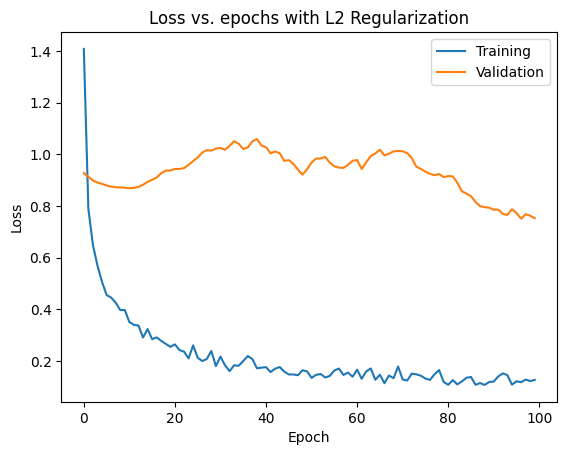

In [28]:
""" [TIPS] se puede hacer con un par√°metro al definir la Dense layer """
from keras.regularizers import l2

np.random.seed(42)
tf.random.set_seed(42)
# Cargar el dataset de Diabetes
diabetes = load_diabetes()
data = diabetes['data']
targets = diabetes['target']
targets = (targets - targets.mean(axis=0)) / targets.std()
train_data, test_data, train_targets, test_targets = train_test_split(data, targets, test_size=0.1, random_state=42)

# Definir el modelo MLP para regresi√≥n con Batch Normalization y L2 Regularization
model = Sequential()
model.add(Dense(64, kernel_initializer=HeNormal(), kernel_regularizer=l2(0.0001), input_shape=(train_data.shape[1],)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(64, kernel_initializer=HeNormal(), kernel_regularizer=l2(0.0001)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(64, kernel_initializer=HeNormal(), kernel_regularizer=l2(0.0001)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(64, kernel_initializer=HeNormal(), kernel_regularizer=l2(0.0001)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(1))

# Configurar el optimizador Adam con gradient clipping
optimizer = Adam(clipvalue=1.0)

# Compilar el modelo
model.compile(optimizer=optimizer, loss='mse')

# Entrenar el modelo con batch_size de 64
history = model.fit(train_data, train_targets, epochs=100, validation_split=0.1, batch_size=64)

# Evaluar el modelo
loss = model.evaluate(test_data, test_targets)
print(f"Test Loss: {loss}")

# Visualizar la p√©rdida durante el entrenamiento
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs with L2 Regularization')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

üôã **Comentario sobre los Resultados con L2 Regularizaci√≥n Ajustada**


---

**Observaciones del Gr√°fico**

1. **P√©rdida de Entrenamiento:**
   - La curva azul muestra una disminuci√≥n constante en la p√©rdida de entrenamiento, alcanzando valores bajos y estabiliz√°ndose hacia el final del entrenamiento. Esto indica que el modelo est√° aprendiendo adecuadamente de los datos de entrenamiento.

2. **P√©rdida de Validaci√≥n:**
   - La curva naranja de p√©rdida de validaci√≥n tambi√©n muestra una tendencia a la baja, aunque se estabiliza en un valor m√°s alto que la p√©rdida de entrenamiento, lo cual es esperado. Sin embargo, la diferencia entre las dos curvas es notable.

**An√°lisis del Test Loss**

El valor de p√©rdida (MSE) en el conjunto de prueba es 0.95. Este valor es mayor en comparaci√≥n con los valores obtenidos con algunos de los modelos anteriores, pero menor que el valor obtenido con la regularizaci√≥n L2 m√°s fuerte.

**Evaluaci√≥n del Overfitting**

- **Presencia de Overfitting:**
  - La diferencia entre la p√©rdida de entrenamiento y la p√©rdida de validaci√≥n sugiere que hay cierto nivel de overfitting, ya que la p√©rdida de validaci√≥n es significativamente mayor que la de entrenamiento.
  - Sin embargo, el overfitting no es tan pronunciado como en el caso sin regularizaci√≥n, donde la p√©rdida de validaci√≥n aumentaba notablemente.

**Comparaci√≥n con Resultados Anteriores**

1. **Estabilidad del Entrenamiento:**
   - La regularizaci√≥n L2 ajustada ha proporcionado una mejor estabilidad en el entrenamiento comparado con la regularizaci√≥n L2 m√°s fuerte (0.01), que result√≥ en una p√©rdida muy alta.

2. **Test Loss:**
   - El test loss de 0.95 es aceptable pero mayor que el obtenido con el modelo que usaba Batch Normalization solo, que ten√≠a un test loss de 0.79. Esto sugiere que la regularizaci√≥n L2, aunque √∫til para controlar el overfitting, no ha optimizado completamente el rendimiento del modelo en comparaci√≥n con las t√©cnicas anteriores.

3. **Curva de P√©rdida:**
   - La curva de p√©rdida de validaci√≥n es m√°s estable y muestra una tendencia a la baja, lo cual es una mejora en comparaci√≥n con la implementaci√≥n sin regularizaci√≥n.

**Conclusi√≥n**

El ajuste de la regularizaci√≥n L2 a un valor de 0.001 ha mejorado la estabilidad del modelo y ha reducido la p√©rdida en comparaci√≥n con una regularizaci√≥n m√°s fuerte, aunque todav√≠a se observa un cierto nivel de overfitting. La mejora es evidente en t√©rminos de estabilidad y reducci√≥n de la p√©rdida en el conjunto de validaci√≥n, aunque el test loss a√∫n es mayor que el obtenido con algunas t√©cnicas anteriores.

En resumen, la regularizaci√≥n L2 ha contribuido a la estabilidad y ha mitigado en parte el overfitting, pero no ha mejorado el rendimiento tanto como las t√©cnicas anteriores, como Batch Normalization sin regularizaci√≥n adicional. Esto sugiere que una combinaci√≥n de t√©cnicas o ajustes adicionales pueden ser necesarios para optimizar completamente el modelo.

### Drop-out

**Tarea 7**: Re-implementa el modelo a√±adiendo capas de Dropout con un ratio de probabilidad de 0.2. Vuelve a entrenar el modelo y compara los resultados de entrenamiento con las t√©cnicas anteriores.

Epoch 1/100
6/6 [==============================] - 3s 55ms/step - loss: 2.0144 - val_loss: 0.9005
Epoch 2/100
6/6 [==============================] - 0s 9ms/step - loss: 1.7027 - val_loss: 0.9011
Epoch 3/100
6/6 [==============================] - 0s 9ms/step - loss: 1.3871 - val_loss: 0.8973
Epoch 4/100
6/6 [==============================] - 0s 12ms/step - loss: 1.0962 - val_loss: 0.8919
Epoch 5/100
6/6 [==============================] - 0s 10ms/step - loss: 1.1006 - val_loss: 0.8868
Epoch 6/100
6/6 [==============================] - 0s 10ms/step - loss: 0.9623 - val_loss: 0.8825
Epoch 7/100
6/6 [==============================] - 0s 11ms/step - loss: 1.0377 - val_loss: 0.8799
Epoch 8/100
6/6 [==============================] - 0s 12ms/step - loss: 0.9411 - val_loss: 0.8778
Epoch 9/100
6/6 [==============================] - 0s 9ms/step - loss: 0.9893 - val_loss: 0.8768
Epoch 10/100
6/6 [==============================] - 0s 14ms/step - loss: 0.9247 - val_loss: 0.8767
Epoch 11/100
6/6 [====

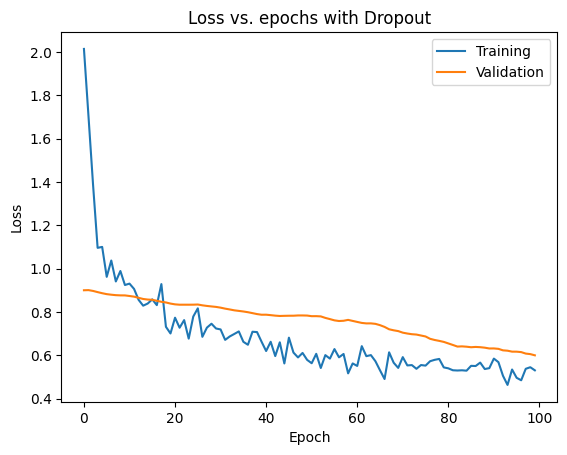

In [29]:
from keras.layers import Dropout

np.random.seed(42)
tf.random.set_seed(42)
# Cargar el dataset de Diabetes
diabetes = load_diabetes()
data = diabetes['data']
targets = diabetes['target']
targets = (targets - targets.mean(axis=0)) / targets.std()
train_data, test_data, train_targets, test_targets = train_test_split(data, targets, test_size=0.1, random_state=42)

# Definir el modelo MLP para regresi√≥n con Batch Normalization y Dropout
model = Sequential()
model.add(Dense(64, kernel_initializer=HeNormal(), input_shape=(train_data.shape[1],)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(64, kernel_initializer=HeNormal()))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(64, kernel_initializer=HeNormal()))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(64, kernel_initializer=HeNormal()))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(1))

# Configurar el optimizador Adam con gradient clipping
optimizer = Adam(clipvalue=1.0)

# Compilar el modelo
model.compile(optimizer=optimizer, loss='mse')

# Entrenar el modelo con batch_size de 64
history = model.fit(train_data, train_targets, epochs=100, validation_split=0.1, batch_size=64)

# Evaluar el modelo
loss = model.evaluate(test_data, test_targets)
print(f"Test Loss: {loss}")

# Visualizar la p√©rdida durante el entrenamiento
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs with Dropout')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

Si todo ha ido bien, vemos el efecto positivo de la regularizaci√≥n!